In [16]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

datapath = 'ex4data1.mat'
data = scipy.io.loadmat(datapath)
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [17]:
num_sample = 5000
num_train = 4500
num_class =10

In [18]:
y_target = np.zeros((num_sample, num_class))
y_target[range(num_sample), y - 1] = 1
print(y_target.shape)

(5000, 10)


In [19]:
# index = np.where(y == 10)[0]
# y[index] = 0

In [20]:
ids = np.random.permutation(range(X.shape[0]))
num_train = 4500
X_train = X[ids[:num_train]]
y_train = y_target[ids[:num_train]]
X_test = X[ids[num_train:]]
y_test = y_target[ids[num_train:]]
print(X_train.shape)
print(X_test.shape)

(4500, 400)
(500, 400)


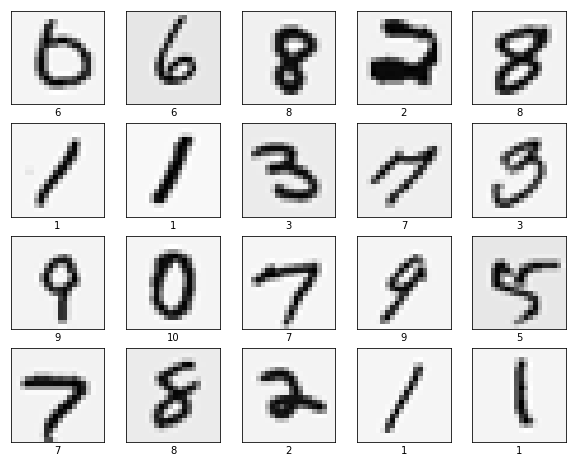

In [21]:
fig = plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid('off')
    plt.imshow(X_train[i].reshape(20, 20).T, cmap=plt.cm.gray_r)
    plt.xlabel(np.argmax(y_train[i]) + 1)

In [22]:
weightpath = 'ex4weights.mat'
weights = scipy.io.loadmat(weightpath)
# print(weights)
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [23]:
def addones(x):
    return np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

In [24]:
# a = np.array([1,2,3])
# a[y[0]]
# b = np.array([2,3,1])
# b[a[y[0]]]

In [25]:
# def h(theta, x):
#     return 1 / (1+np.exp(-np.dot(x, theta)))
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def grad_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))
    
def feedfw(theta1, theta2, x):
    x = addones(x) #4500x401
    z1 = np.dot(x, theta1.T) #4500x25
#     print(z1.shape)
    a1 = sigmoid(z1)
    a1 = addones(a1) #4500x26
    z2 = np.dot(a1, theta2.T) #4500x10
#     print(z2.shape)
    a2 = sigmoid(z2)
#     print(a2.shape)
    return a2

def cost(y_pred, y_target, num_train):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train

def cost_regu(y_pred, y_target, theta1, theta2, ld, num_train):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train + ld * \
            (np.sum(theta1**2)+np.sum(theta2**2)-np.sum(theta1[:,0]**2)-np.sum(theta2[:,0]**2)) / (2*num_train)

In [26]:
# num_train = 5000
ld = 1
a2 = feedfw(theta1, theta2, X)
print(cost(a2, y_target, num_train=5000))
print(cost_regu(a2, y_target, theta1, theta2, ld, num_train=5000))
# print(a2[0])
# print(y[0])
# print(y_target[0])

0.2876291651613189
0.38376985909092365


In [27]:
lr = 1
ite = 100000

In [28]:
num_train = X_train.shape[0]
num_feature = X_train.shape[1]
num_hidden = 25
w1 = np.random.rand(num_feature, num_hidden) / np.sqrt(num_feature) #400x25
b1 = np.zeros((1, num_hidden)) #1x25
w2 = np.random.rand(num_hidden, num_class) / np.sqrt(num_hidden) #25x10
b2 = np.zeros((1, num_class)) #1x10
# print(w1.shape, w2.shape, b1.shape, b2.shape)   

for it in range(ite):
    #feed forward
    z1 = np.dot(X_train, w1) + b1 #4500x25
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2 #4500x10
    a2 = sigmoid(z2)
    
    #lost
    lost = cost(a2, y_train, num_train)
    if it%(ite/10) == 0:
        print('Ite {0} Lost {1}'.format(it, lost))
        
    #backprop
    dz2 = (a2 - y_train) / num_train #4500x10
    dw2 = np.dot(a1.T, dz2) #25x10
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, w2.T) #4500x25
#     print(a1[0])
#     dz1 = da1 * (a1*(1-a1))
    dz1 = da1 * grad_sigmoid(z1)
    dw1 = np.dot(X_train.T, dz1) #400x25
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
#     dw1 /= num_train
#     dw2 /= num_train
#     db1 /= num_train
#     db2 /= num_train
    
    #update
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2

Ite 0 Lost 18.197428487314838
Ite 10000 Lost 0.03768680113441609
Ite 20000 Lost 0.015157573554464088
Ite 30000 Lost 0.00876293022499173
Ite 40000 Lost 0.005926040080159198
Ite 50000 Lost 0.00442848428682779
Ite 60000 Lost 0.0035210001078516636
Ite 70000 Lost 0.0029122972970231616
Ite 80000 Lost 0.0024756558078609186
Ite 90000 Lost 0.002147461207129389


In [29]:
z1 = np.dot(X_train, w1) + b1 #4500x25
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2 #4500x10
a2 = sigmoid(z2)

acc_train = np.mean(np.argmax(a2, axis=1) == np.argmax(y_train, axis=1))
print('Acc_train: %.2f'%(100*acc_train))

Acc_train: 100.00


In [30]:
z1 = np.dot(X_test, w1) + b1 #4500x25
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2 #4500x10
a2 = sigmoid(z2)

acc_test = np.mean(np.argmax(a2, axis=1) == np.argmax(y_test, axis=1))
print('Acc_test: %.2f'%(100*acc_test))

Acc_test: 90.60
